# Linear Regresssion (non linear)

$$ y = -X^3 - 8X^2 + 3$$

## Import libraries

In [1]:
import numpy as np

import torch

# 신경망 모형
import torch.nn as nn

# 경사하강법 알고리즘
import torch.optim as optim

# 텐서 초기값 부여
import torch.nn.init as init

# 자동미분
from torch.autograd import Variable

## Generate data

In [2]:
# 데이터의 갯수
num_data = 1000 

# 경사하강법 반복 수
num_epoch = 1000

#
noise = init.normal_(torch.FloatTensor(num_data,1),std=1)
x = init.uniform_(torch.Tensor(num_data,1),-15,10)

y = -x**3 - 8*(x**2) + 3
y_noise = y+noise

print(x[:10])
print(y[:10])
print(y_noise[:10])

tensor([[  1.1117],
        [ -6.0614],
        [ -6.3982],
        [ -5.6737],
        [ -4.0657],
        [ -5.0216],
        [ -1.0927],
        [  4.8780],
        [ -0.7944],
        [-11.4814]])
tensor([[  -8.2607],
        [ -68.2251],
        [ -62.5727],
        [ -71.8857],
        [ -62.0343],
        [ -72.1046],
        [  -5.2477],
        [-303.4257],
        [  -1.5468],
        [ 461.9220]])
tensor([[  -7.6979],
        [ -67.2337],
        [ -60.8817],
        [ -71.3841],
        [ -63.5215],
        [ -71.7730],
        [  -5.7564],
        [-303.4938],
        [  -0.6030],
        [ 461.6690]])


## Define model & optimizer

- Model: 
    - linear model
    
    
- Loss function:
    - MSE
    
    
- Optimizer:
    - SGD

In [3]:
model = nn.Linear(1, 1)

loss_func = nn.MSELoss()

optimizer = optim.SGD(model.parameters(), 
                      lr=0.01)

## Train

In [4]:
loss_arr = []
label = Variable(y_noise)

for idx, epoch in enumerate(range(num_epoch)):
    optimizer.zero_grad()
    
    output = model(Variable(x))
    
    loss = loss_func(output, label)
    loss.backward()
    optimizer.step()
    
    if idx % 10 == 0:
        print(loss)
        
    loss_arr.append(loss.data.numpy())

tensor(365415.7188, grad_fn=<MseLossBackward>)
tensor(122613.2344, grad_fn=<MseLossBackward>)
tensor(110447.4844, grad_fn=<MseLossBackward>)
tensor(101996.9609, grad_fn=<MseLossBackward>)
tensor(96127.1094, grad_fn=<MseLossBackward>)
tensor(92049.7969, grad_fn=<MseLossBackward>)
tensor(89217.6250, grad_fn=<MseLossBackward>)
tensor(87250.3672, grad_fn=<MseLossBackward>)
tensor(85883.8750, grad_fn=<MseLossBackward>)
tensor(84934.6875, grad_fn=<MseLossBackward>)
tensor(84275.3672, grad_fn=<MseLossBackward>)
tensor(83817.3906, grad_fn=<MseLossBackward>)
tensor(83499.2812, grad_fn=<MseLossBackward>)
tensor(83278.3047, grad_fn=<MseLossBackward>)
tensor(83124.8125, grad_fn=<MseLossBackward>)
tensor(83018.2109, grad_fn=<MseLossBackward>)
tensor(82944.1719, grad_fn=<MseLossBackward>)
tensor(82892.6953, grad_fn=<MseLossBackward>)
tensor(82856.9609, grad_fn=<MseLossBackward>)
tensor(82832.1562, grad_fn=<MseLossBackward>)
tensor(82814.9219, grad_fn=<MseLossBackward>)
tensor(82802.9453, grad_fn=<Ms

In [5]:
param_list = list(model.parameters())
print(param_list[0].data,param_list[1].data)

tensor([[-72.6042]]) tensor([-249.0000])


In [6]:
X = -1.8578
y_hat = -74.3268 * X - 231.8555

print(y_hat)

-93.77117096


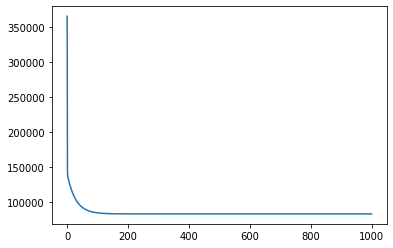

In [7]:
import matplotlib.pyplot as plt

plt.plot(loss_arr)
plt.show()